In [68]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import glob, os.path, re

matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [69]:
# 각 파일 처리
def load_files(path):
    freqs = []
    results = []
    file_list = glob.glob(path)
    for fname in file_list: # 파일개수 : 20번 실행
        name = os.path.basename(fname) # 파일1번,파일2번
        lang = name.split("-")[0]      # en,en,en,en,en,fr,fr.......
        
        with open (fname,'r',encoding='utf-8') as f:       # fname : './lang/train\\en-1.txt' , name : en-1.txt
            text = f.read()
        
        text = text.lower() # 모든 문자를 소문자로 변환
        cnt = [ 0 for n in range(0,26) ]  
        code_a = ord('a')
        code_z = ord('z')
        
        # 메모장안의 모든 문자를 가져와서, a-z사이의 문자만 저장
        for ch in text:
            n = ord(ch)
            if code_a <= n <= code_z:
                cnt[n-code_a] += 1    # b 98-97 = 1 -> 1의 자리에 1증가
              
        # 정규화 작업 -  각 피쳐마다 비율을 일정하게 맞춤. 
        total = sum(cnt)
        # 데이터의 값이 0-1사의 값으로 변환
        freq = list(map(lambda n: n/total,cnt))
        
        # data값을 저장
        freqs.append(freq)
              
        # 결과값 리스트 저장
        results.append(lang) 
    
    return {"freqs":freqs,"results":results}
    

파일 확인

In [70]:
path = './lang/train/*.txt'
path2 = './lang/test/*.txt'

# 함수호출 - train_input,train_target,     test_input,test_target
data = load_files(path) # 함수호출 - 20개의 train 데이터를 가져옴.
test = load_files(path2) # 함수호출 - 8개의 test 데이터를 가져옴.
data['freqs'][0]
test['freqs'][0]
data['results'][0]


'en'

### 데이터 전처리 - train세트, test세트 생성
머신러닝순서

1. 데이터 전처리

2. 데이터 학습시키기

3. 데이터 예측하기

4. 정답률 출력하기


In [71]:
# 데이터 학습시키기
clf = svm.SVC()
clf.fit(data['freqs'],data['results'])

# 데이터 예측하기
predict = clf.predict(test['freqs'])
print("결과 값 : ",predict)

결과 값 :  ['en' 'en' 'fr' 'fr' 'id' 'id' 'tl' 'tl']


In [72]:
score = clf.score(test['freqs'],test['results'])
print("정답률 : ",score)

정답률 :  1.0


In [73]:
cl_report = metrics.classification_report(test['results'],predict)
print(cl_report)

              precision    recall  f1-score   support

          en       1.00      1.00      1.00         2
          fr       1.00      1.00      1.00         2
          id       1.00      1.00      1.00         2
          tl       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [74]:
data['freqs'][0][:3]

[0.07595212187159957, 0.012840043525571273, 0.04570184983677911]

In [75]:
data['freqs'][1][:3]

[0.08417789436031954, 0.019911768212710148, 0.030404196971503518]

array([<Axes: title={'center': 'en'}>, <Axes: title={'center': 'fr'}>,
       <Axes: title={'center': 'id'}>, <Axes: title={'center': 'tl'}>],
      dtype=object)

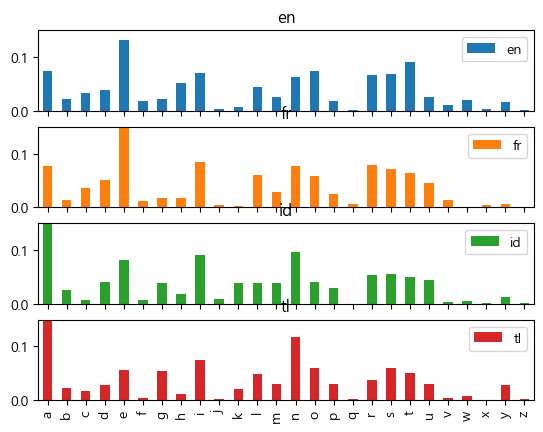

In [77]:
# 그래프 그리기
lang_dic = {}
for i,result in enumerate(data['results']):
    fq = data['freqs'][i]  # data부분을 가지고 옴.
    if not (result in lang_dic):
        lang_dic[result] = fq
    for idx, v in enumerate(fq):
        lang_dic[result][idx] = ( lang_dic[result][idx] + v ) / 2  
        
# x축의 눈금을 생성
asc_list = [chr(n) for n in range(97,122+1)]   #97:a , 122:z  
df = pd.DataFrame(lang_dic,index=asc_list)  
df.plot(kind='bar',subplots=True,ylim=(0,0.15))    
          

In [80]:
df

,en,fr,id,tl
a,0.073792,0.076364,0.174445,0.200662
b,0.021171,0.013063,0.025219,0.022221
c,0.032744,0.036548,0.006991,0.016142
d,0.038673,0.050288,0.040997,0.028151
e,0.132650,0.148401,0.080607,0.056933
f,0.018442,0.012125,0.007259,0.004553
g,0.022573,0.016470,0.039173,0.053827
h,0.051041,0.016609,0.018819,0.011328
i,0.069741,0.085023,0.091622,0.075240
j,0.002658,0.003776,0.007924,0.002039


In [79]:
df.columns

Index(['en', 'fr', 'id', 'tl'], dtype='object')

(0.0, 0.15)

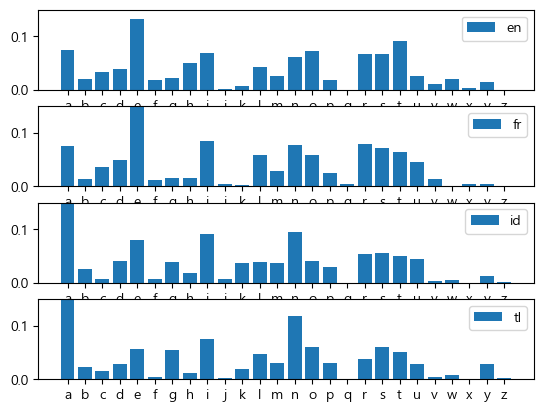

In [83]:
fig,axs = plt.subplots(4)
axs[0].bar(df.index,df['en'],label=df.columns[0])
axs[1].bar(df.index,df['fr'],label=df.columns[1])
axs[2].bar(df.index,df['id'],label=df.columns[2])
axs[3].bar(df.index,df['tl'],label=df.columns[3])
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()
axs[0].set_ylim(0,0.15)
axs[1].set_ylim(0,0.15)
axs[2].set_ylim(0,0.15)
axs[3].set_ylim(0,0.15)

In [ ]:
# 아스키코드 : 문자를 숫자로 표시, A:65, a:97, 숫자 0 : 48
chr(97-32)
chr(65+32)
chr(50-48) # 숫자가 2가 아닌 문자 2가 출력됨.

'\x02'

In [ ]:
chr(97)

'a'

In [ ]:
chr(91)

'['

In [ ]:
ord('a')

97

In [ ]:
ord('z')

122

In [ ]:
np.zeros(26)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
np.ones(26)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
[0 for n in range(0,20)]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
# 1개 파일이름
name = os.path.basename(file_list[0])
lang = name.split('-')
print(lang[0])

# 1개 파일 내용 읽어오기
cnt = [0 for n in range(0,26)]
with open('./lang/train/'+name,'r',encoding='utf-8') as f:
    # print(f.read())
    text = f.read()
    text = text.lower() # 소문자로 치환
    # 문자 개수 세기
    # 영문자가 26개 있음. 배열 26개 짜리를 1개 생성
    # 1개씩 문자를 읽어와서 26개의 배열에서 1씩 추가
    code_a = ord('a')
    code_z = ord('z')
    for ch in text: # 
        n = ord(ch)
        # [ 2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..... ]
        if code_a <= n <= code_z: # a~z사이의 문자이면
            # 리스트에 저장
            cnt[n - code_a] += 1   # 해당되는 위치에 1을 증가
            
    # 정규화
    total = sum(cnt)
    
    # freq의 배열의 값을 total로 나눠서 다시 리스트를 만듬.
    # freq = []
    # for i in cnt:
    #     freq.append((i/total))
    
    # def change(n):
    #     return n/total
    # freq = list(map(change(n),cnt)) 
        
    freq = list(map(lambda n : n/total,cnt)) 
           
    
print(freq)            
    


en
[0.07595212187159957, 0.012840043525571273, 0.04570184983677911, 0.04613710554951034, 0.10533188248095757, 0.015669205658324265, 0.019151251360174103, 0.043743199129488576, 0.07399347116430903, 0.0017410228509249185, 0.00544069640914037, 0.05375408052230685, 0.026332970620239392, 0.07747551686615888, 0.08966267682263329, 0.016539717083786723, 0.0, 0.07769314472252448, 0.061371055495103376, 0.08052230685527748, 0.02589771490750816, 0.009793253536452665, 0.014145810663764961, 0.0006528835690968443, 0.02002176278563656, 0.0004352557127312296]


In [ ]:
# name = os.path.basename(file_list[0])
# 폴더의 모든 파일의 이름을 가져옴.

data = []
results = []

for fname in file_list:
    name = os.path.basename(fname)
    print(name)
    
    # 데이터 가져오기
    
    
    
    
    
    # str split을 사용해서 앞에 있는 2글자만 분리해서 출력하시오.
    lang = name.split('-')
    print(lang)
    results.append(lang[0])
    


en-1.txt
['en', '1.txt']
en-2.txt
['en', '2.txt']
en-3.txt
['en', '3.txt']
en-4.txt
['en', '4.txt']
en-5.txt
['en', '5.txt']
fr-10.txt
['fr', '10.txt']
fr-6.txt
['fr', '6.txt']
fr-7.txt
['fr', '7.txt']
fr-8.txt
['fr', '8.txt']
fr-9.txt
['fr', '9.txt']
id-11.txt
['id', '11.txt']
id-12.txt
['id', '12.txt']
id-13.txt
['id', '13.txt']
id-14.txt
['id', '14.txt']
id-15.txt
['id', '15.txt']
tl-16.txt
['tl', '16.txt']
tl-17.txt
['tl', '17.txt']
tl-18.txt
['tl', '18.txt']
tl-19.txt
['tl', '19.txt']
tl-20.txt
['tl', '20.txt']


['en',
 'en',
 'en',
 'en',
 'en',
 'fr',
 'fr',
 'fr',
 'fr',
 'fr',
 'id',
 'id',
 'id',
 'id',
 'id',
 'tl',
 'tl',
 'tl',
 'tl',
 'tl']